In [2]:
33.57 + 41.82 + 280

355.39

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dfr=pd.read_csv('files/rainYearly.csv')
dft=pd.read_csv('files/tempYearly.csv')

dfr.head()

,Year,Rainfall
0,1956,1.01
1,1957,1.66
2,1958,3.50
3,1959,3.31
4,1960,3.61


<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

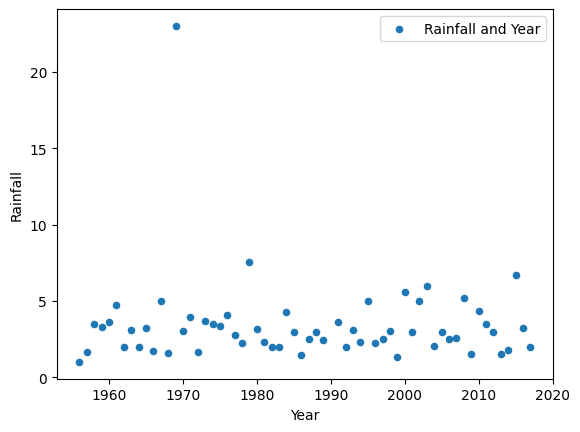

In [7]:
dfr.plot.scatter(x='Year', y='Rainfall', label='Rainfall and Year')

<AxesSubplot:xlabel='Year', ylabel='Temperature'>

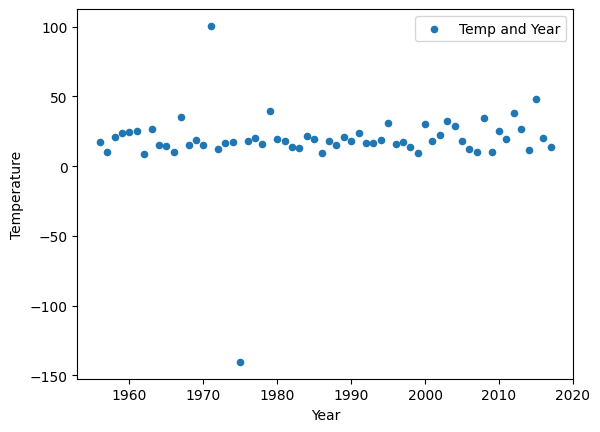

In [6]:
dft.plot.scatter(x='Year',y='Temperature', label='Temp and Year')

### eliminate outliers

<AxesSubplot:xlabel='Year', ylabel='Temperature'>

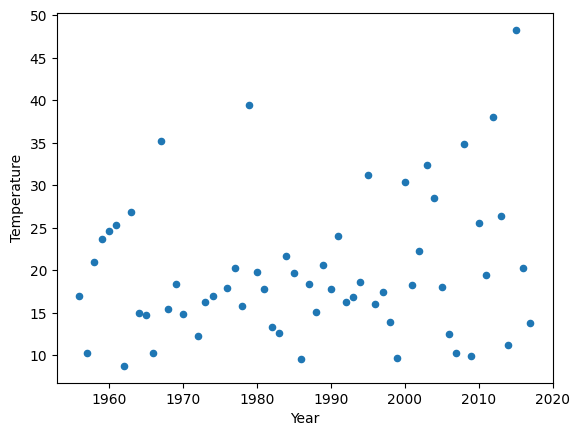

In [9]:
dftf= dft[(dft.Temperature >= -50) & (dft.Temperature <= 60)]
dftf.plot.scatter(x='Year',y='Temperature')

In [14]:
maskR = (dfr.Rainfall > dfr.Rainfall.min()) & (dfr.Rainfall < dfr.Rainfall.max())
maskR.head()

0    False
1     True
2     True
3     True
4     True
Name: Rainfall, dtype: bool

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

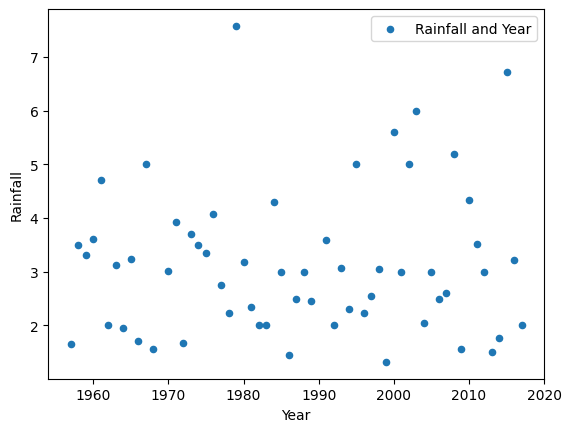

In [15]:
dfrf=dfr[maskR]
dfrf.plot.scatter(x='Year', y='Rainfall', label='Rainfall and Year')


<AxesSubplot:xlabel='Year', ylabel='Temperature'>

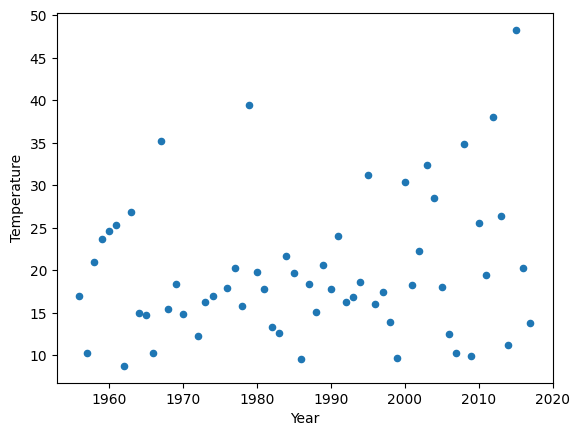

In [12]:
dftf= dft[(dft.Temperature > dft.Temperature.min()) & (dft.Temperature < dft.Temperature.max())]
dftf.plot.scatter(x='Year',y='Temperature')

### Using queries

<AxesSubplot:xlabel='Year', ylabel='Temperature'>

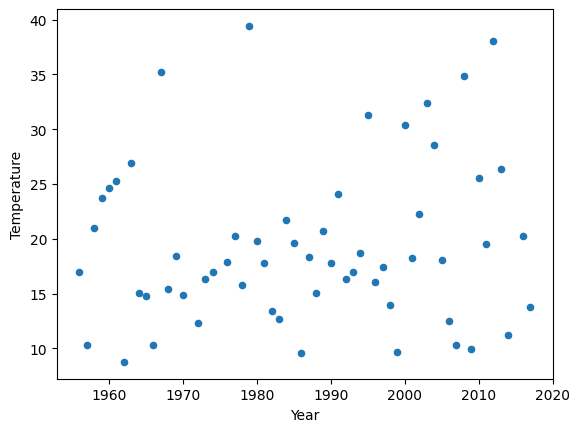

In [31]:

dft_f=dft.query('Temperature < 40 & Temperature > 0')
dft_f.plot.scatter(x='Year',y='Temperature')

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

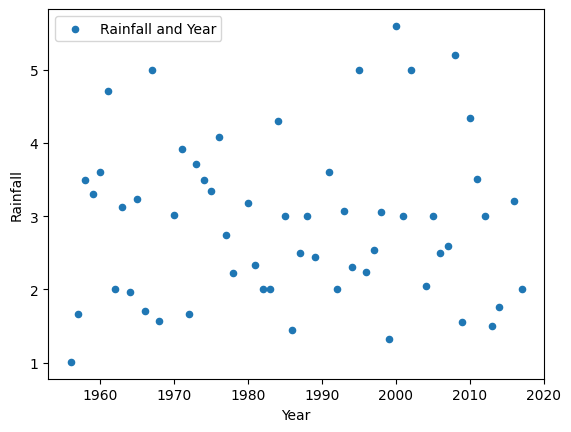

In [32]:

dfr_f=dfr.query(f'Rainfall < 6 & Rainfall > 0')
dfr_f.plot.scatter(x='Year',y='Rainfall', label='Rainfall and Year') 

### variations of queries

<AxesSubplot:xlabel='Year', ylabel='Temperature'>

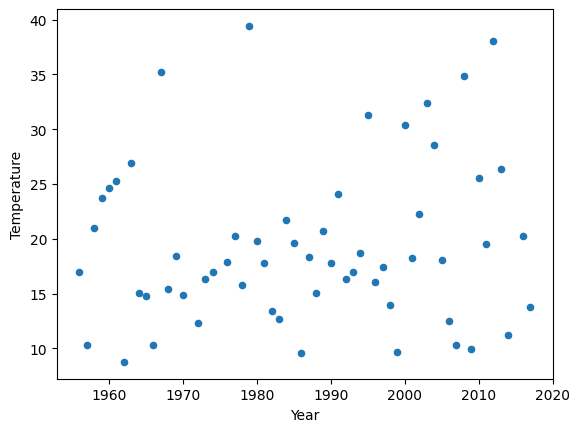

In [21]:
minn=dft.Temperature.min()
dft_temp=dft.query('Temperature < 40 & Temperature > 0')
dft_temp.plot.scatter(x='Year',y='Temperature')

<AxesSubplot:xlabel='Year', ylabel='Temperature'>

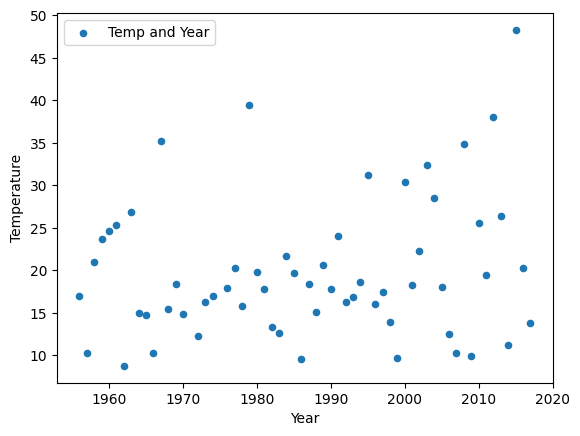

In [30]:
minn=dft.Temperature.min()
dft_temp=dft.query(f'Temperature < {dft.Temperature.max()} & Temperature > {minn}')
dft_temp.plot.scatter(x='Year',y='Temperature', label='Temp and Year')

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

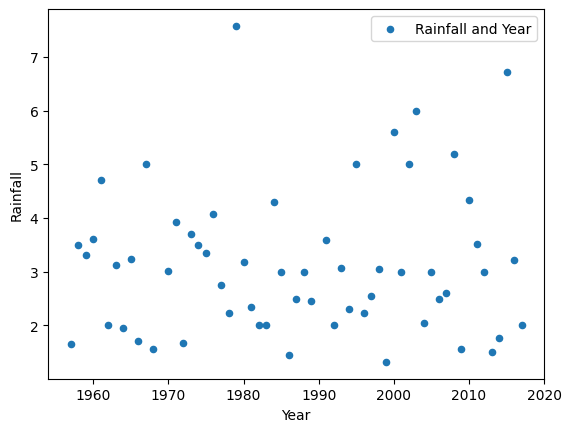

In [29]:
# plt.figure(figsize=(15,10))
minn=dfr.Rainfall.min()
dfr_temp=dfr.query(f'Rainfall < {dfr.Rainfall.max()} & Rainfall > {minn}')
dfr_temp.plot.scatter(x='Year',y='Rainfall', label='Rainfall and Year')

### Merge

In [50]:
dft_f=dft.query('Temperature < 40 & Temperature > 0')
dfr_f=dfr.query('Rainfall < 6 & Rainfall > 0')

df_merge = pd.merge(dft_f, dfr_f, on='Year', how='outer')

df_merge.tail(4)

,Year,Temperature,Rainfall
57,2016,20.29,3.21
58,2017,13.81,2.00
59,1971,NaN,3.92
60,1975,NaN,3.35


In [51]:
df_merge.isna().sum()

Year           0
Temperature    2
Rainfall       4
dtype: int64

#### display rows with nans

In [53]:
## axis=1, it is applied to rows.
df_merge[df_merge.isna().any(axis=1)]

,Year,Temperature,Rainfall
13,1969,18.43,NaN
21,1979,39.42,NaN
32,1990,17.78,NaN
45,2003,32.40,NaN
59,1971,NaN,3.92
60,1975,NaN,3.35


#### create list of indexes and fill nan with mean values

In [54]:
list1=df_merge[df_merge.isna().any(axis=1)].index.values.tolist()

df_merge.fillna(df_merge.mean(), inplace=True)

df_merge.iloc[list1]

,Year,Temperature,Rainfall
13,1969,18.430000,2.908947
21,1979,39.420000,2.908947
32,1990,17.780000,2.908947
45,2003,32.400000,2.908947
59,1971,19.385085,3.920000
60,1975,19.385085,3.350000


In [55]:
df_merge.fillna(df_merge.mean(), inplace=True)
df_merge.isna().sum()


Year           0
Temperature    0
Rainfall       0
dtype: int64

In [56]:
df_merge = pd.merge(dft_f, dfr_f, on='Year', how='inner')

df_merge.tail()

,Year,Temperature,Rainfall
50,2012,38.01,3.00
51,2013,26.41,1.50
52,2014,11.24,1.76
53,2016,20.29,3.21
54,2017,13.81,2.00


#### v4 Sort

In [64]:
## df.sort_values(by=['Brand'], inplace=True, ascending=False)

df_merge = pd.merge(dft_f, dfr_f, on='Year', how='inner')
df_merge.sort_values(by=['Temperature'], ascending=False).head(10)

,Year,Temperature,Rainfall
50,2012,38.01,3.00
11,1967,35.26,5.00
46,2008,34.81,5.20
34,1995,31.27,5.00
39,2000,30.40,5.60
42,2004,28.55,2.05
7,1963,26.88,3.12
51,2013,26.41,1.50
48,2010,25.56,4.34
5,1961,25.29,4.71


In [65]:
df_merge.sort_values(by=['Rainfall'], ascending=False).head(10)

,Year,Temperature,Rainfall
39,2000,30.40,5.60
46,2008,34.81,5.20
11,1967,35.26,5.00
34,1995,31.27,5.00
41,2002,22.23,5.00
5,1961,25.29,4.71
48,2010,25.56,4.34
24,1984,21.70,4.30
17,1976,17.92,4.08
15,1973,16.29,3.71


In [61]:
df_merge.set_index('Year',inplace=True)
df_merge.corr()

,Temperature,Rainfall
Temperature,1.000000,0.674128
Rainfall,0.674128,1.000000


### seaborn v5

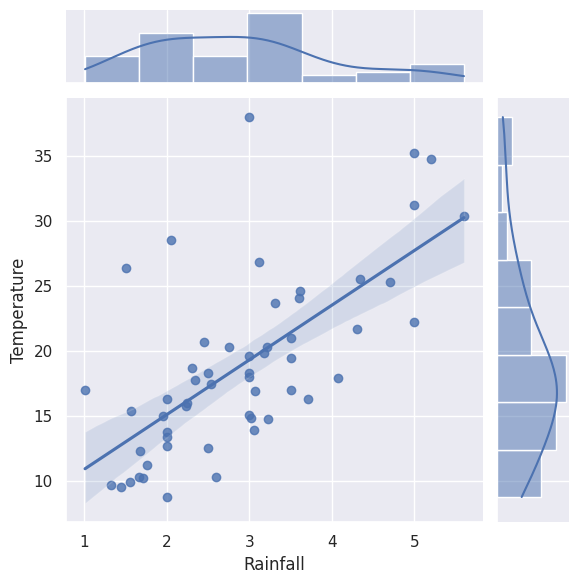

In [69]:
sns.set(rc={'figure.figsize':(12,6)})
sns.jointplot(x='Rainfall', y='Temperature', data = df_merge, kind='reg')
plt.show()

In [70]:
dft_f=dft.query('Temperature < 40 & Temperature > 0')
dfr_f=dfr.query('Rainfall < 6 & Rainfall > 0')

df_merge2 = pd.merge(dft_f, dfr_f, on='Year', how='outer')

df_merge2.tail(4)

,Year,Temperature,Rainfall
57,2016,20.29,3.21
58,2017,13.81,2.00
59,1971,NaN,3.92
60,1975,NaN,3.35


In [73]:
df_merge2.set_index('Year', inplace=True)

In [74]:
df_merge2.isna().sum()

Temperature    2
Rainfall       4
dtype: int64

In [80]:
df_merge2[df_merge2.isna().any(axis=1)].index.values.tolist()

[1969, 1979, 1990, 2003, 1971, 1975]

In [75]:
df_merge2[df_merge2.isna().any(axis=1)]

,Temperature,Rainfall
Year,,
1969,18.43,NaN
1979,39.42,NaN
1990,17.78,NaN
2003,32.40,NaN
1971,NaN,3.92
1975,NaN,3.35
